In [1]:
import re
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import nltk 
nltk.data.path.append("/var/lib/docker/nltk_data")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from textblob import TextBlob
from textblob import Word
from pywsd.utils import lemmatize_sentence

Warming up PyWSD (takes ~10 secs)... took 4.47531795501709 secs.


In [2]:
data = pd.read_csv('data/ads_en_us.csv')

In [3]:
data.head()

,Unnamed: 0,catid,id,subcatid,value
0,0,2,45493,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
1,1,2,45499,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
2,2,2,45522,27,Overview:\r\n\r\nUnder general supervision by ...
3,3,2,45543,134,Be your own boss working under a Strong Brand ...
4,4,2,45545,134,Be your own boss working under a Strong Brand ...


In [4]:
Counter(data["catid"])

Counter({2: 95005, 3: 2596})

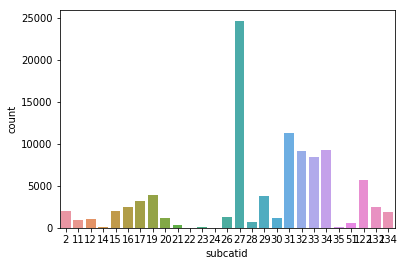

In [5]:
fax = sns.countplot(x="subcatid", data=data)
plt.show()

## Remove Duplicates in value fields 

In [6]:
data = data.drop_duplicates(subset='value',keep='last')

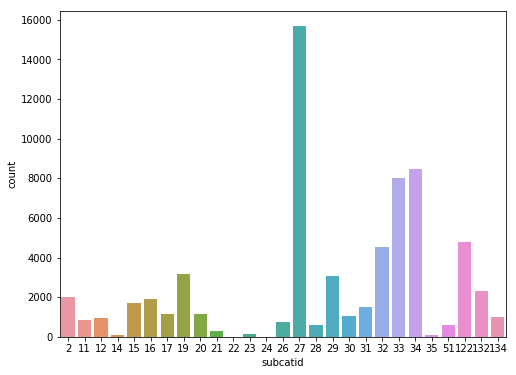

In [7]:
fig = plt.figure(figsize=(8,6))
fax = sns.countplot(x="subcatid", data=data)
plt.show()

# Handling skewness

In [8]:
data_27 = data.loc[data.subcatid == 27, :]
data_27s = data_27.sample(frac=0.5)
data1 = data[data.subcatid != 27]
data_s = pd.concat([data1, data_27s], axis = 0 )


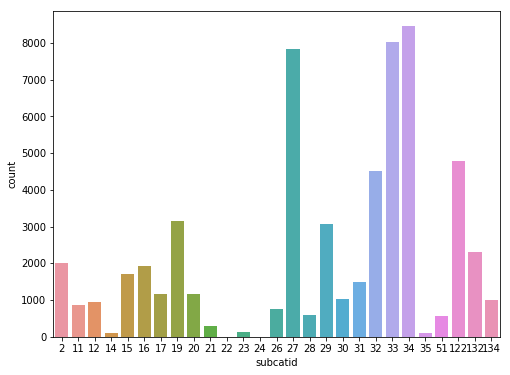

In [9]:
fig = plt.figure(figsize=(8,6))
fax = sns.countplot(x="subcatid", data=data_s)
plt.show()

In [10]:
def clean_str(s):
    """Clean sentence"""
    s = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", s)
    s = re.sub(r"\'s", " \'s", s)
    s = re.sub(r"\'ve", " \'ve", s)
    s = re.sub(r"n\'t", " n\'t", s)
    s = re.sub(r"\'re", " \'re", s)
    s = re.sub(r"\'d", " \'d", s)
    s = re.sub(r"\'ll", " \'ll", s)
    s = re.sub(r",", " , ", s)
    s = re.sub(r"!", " ! ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", s)
    s = re.sub(r'[^\x00-\x7F]+', "", s)
    s = re.sub(r'[^\w\s]',"",s)
    return s.strip().lower()

In [11]:
data_s['value_processed'] = data_s.value.apply(clean_str)

## Keeping Data that has count > 100

In [13]:
data_bal=data_s.groupby('subcatid').filter(lambda x: len(x) >= 100)

In [14]:
data_bal.value_processed.head()

57     job description job description i am pleased t...
106    procurement contracts manager the opportunity ...
107    director  technical accounting and revenue rec...
113    software engineering lead architect as a softw...
118    be your own boss working under a strong brand ...
Name: value_processed, dtype: object

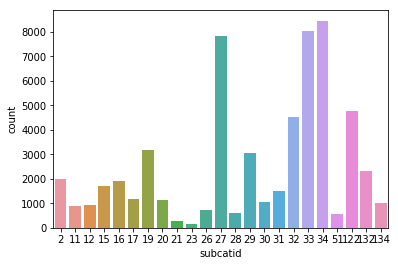

In [15]:
fax = sns.countplot(x="subcatid", data=data_bal)
plt.show()

## Remove Stop words 

In [16]:
stop_words = set(stopwords.words('english'))
stop_words.add('The')
stop_words.add('This')
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [17]:
def remove_stop_words(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    sentence = ' '.join(filtered_sentence)
    return sentence

In [18]:
def perform_stemming(sentence):
    word_tokens = word_tokenize(sentence)
    stemmed_sentence = [ps.stem(w) for w in word_tokens]
    return ' '.join(stemmed_sentence)
    

In [19]:
def perform_lemm(sentence):
    word_tokens = word_tokenize(sentence)
    lemm_sentence = [lemmatizer.lemmatize(w,pos='v') for w in word_tokens]
    return ' '.join(lemm_sentence)

In [20]:
data_bal['value_processed'] = data_bal.value_processed.apply(remove_stop_words)

/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_bal['value_processed_lemm'] = data_bal.value_processed.apply(perform_lemm)

/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
data_bal.value_processed.head(20)

57     job description job description pleased call a...
106    procurement contracts manager opportunity mark...
107    director technical accounting revenue recognit...
113    software engineering lead architect software e...
118    boss working strong brand track record success...
119    usa truck dedicated services division truck dr...
120    cynergistek cynergistek top ranked cybersecuri...
124    job description director technical accounting ...
125    job description enterprise sales development r...
127    technical revenue recognition manager opportun...
128    senior staff engineer security opportunity loo...
129    opportunity member marketo support goal provid...
130    job description trust estate probate paralegal...
131    privacy counsel opportunity marketo seeking pr...
132    enterprise sales development representative op...
133    job description staff software engineer market...
135    technical accounting manager opportunity marke...
137    job description special 

In [23]:
data_bal.value_processed_lemm.head(20)

57     job description job description please call at...
106    procurement contract manager opportunity marke...
107    director technical account revenue recognition...
113    software engineer lead architect software engi...
118    boss work strong brand track record success ca...
119    usa truck dedicate service division truck driv...
120    cynergistek cynergistek top rank cybersecurity...
124    job description director technical account rev...
125    job description enterprise sales development r...
127    technical revenue recognition manager opportun...
128    senior staff engineer security opportunity loo...
129    opportunity member marketo support goal provid...
130    job description trust estate probate paralegal...
131    privacy counsel opportunity marketo seek priva...
132    enterprise sales development representative op...
133    job description staff software engineer market...
135    technical account manager opportunity marketo ...
137    job description special 

# Starting to Perform ML functions 

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer ,TfidfTransformer
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [25]:
X = data_bal.value_processed_lemm
y = data_bal.subcatid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

## Using NB

In [40]:

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=sub_cat))

accuracy 0.540032302722658


## Using OVR With Linear SVC

In [42]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [43]:
#fit model with training data
model.fit(X_train, y_train)

/usr/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ..._class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=None))])

In [44]:
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7913590216889709


# Using Random Forest Search and cross validation

In [26]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 3)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]



# Create the random grid
random_grid = {
               'clf__n_estimators': n_estimators,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf
              }

In [27]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', RandomForestClassifier(max_features='auto',bootstrap=False,random_state = 42))])

In [28]:
gs_clf_rfc = GridSearchCV(model, random_grid, n_jobs=-1)
gs_clf_rfc.fit(X_train, y_train)

/home/sorta/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ...rs='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__n_estimators': [100, 150, 200], 'clf__max_depth': [10, 80, 150], 'clf__min_samples_split': [2, 5, 10], 'clf__min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
gs_clf_rfc.best_params_

{'clf__max_depth': 150,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 200}

In [36]:
gs_clf_rfc.cv_results_

/home/sorta/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sorta/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sorta/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/sorta/.local/lib/python3.6/site-packa

{'mean_fit_time': array([  61.84432673,   74.66871611,  116.25737397,  129.51862462,
          99.22155786,  148.50928815,  149.46035838,  113.05130013,
         143.80360524,  118.42192181,  122.21398203,  111.08038147,
         109.00292842,  149.13972839,  130.27246412,  131.78524446,
         137.88081328,   97.20574538,  146.4585429 ,  128.6593585 ,
          89.6713233 ,  144.34886614,  148.82592098,  112.75055949,
         148.63557514,  147.31376735,  102.08746028, 1564.91208037,
        2430.9434247 , 2951.14470069,  796.18498611, 1008.36515888,
        1283.36852058,  583.30671914,  675.77254836,  913.72642914,
         464.60474205,  468.99130591,  572.99201353,  372.4047056 ,
         411.32117542,  612.52490218,  410.38575435,  397.00025932,
         523.92751773,  314.74550374,  269.78946662,  303.81510433,
         240.52929449,  253.49071964,  298.86242175,  254.80712644,
         247.57652545,  324.63128026, 2500.13183077, 3895.19055351,
        4926.19967818, 1277.989

In [31]:
gs_clf_rfc.best_score_

0.7102101359703338

In [35]:
%%time
model = gs_clf_rfc.best_estimator_
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7195431472081218
CPU times: user 21.3 s, sys: 74.1 ms, total: 21.3 s
Wall time: 22.2 s
